In [1]:
#################################################
################  Import things #################
#################################################

import numpy as np
import timeit
import random
import copy
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
from scipy import stats
import glycowork


In [13]:
from glycowork.glycan_data.loader import glycan_binding as gb

gb_glycans = list(gb.columns)

In [130]:
gb.shape

(1465, 2745)

In [3]:
full_list = []
full_array = np.zeros((gb.shape[0], gb.shape[1]))
for g in range(len(gb_glycans)-2):
    data = gb[gb_glycans[g]].values
    full_array[:, g] = data



In [10]:
# full_list = full_array[50,:].flatten() # first index is the lectin
full_list = full_array[100,:].flatten() # first index is the lectin
print(len(full_list))
full_list = [x for x in full_list if not np.isnan(x)]
full_list = np.array(full_list).flatten()
print(len(full_list))

2745
508


508


Text(0, 0.5, 'Density')

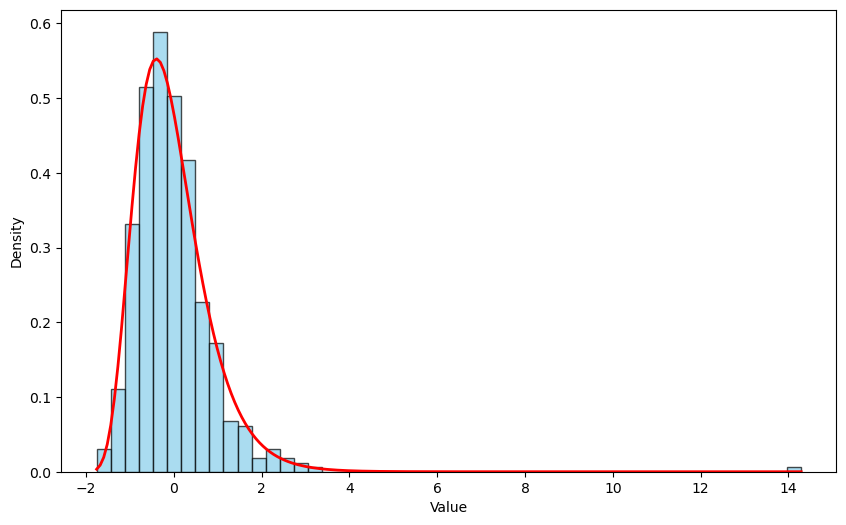

In [11]:
# # Filter out NaN values
# data_list = gb[gb_glycans[60]]
# data_without_nans = np.array([x for x in data_list if not np.isnan(x)])  # or use: data_without_nans = np.array(your_list)[~np.isnan(your_list)]

# Flatten all elements and remove NaNs
# flattened_list = gb.values.flatten()  # Flatten all values into 1D array
# data_without_nans = np.array([x for x in flattened_list if not np.isnan(x)])  # or use: data_without_nans = np.array(your_list)[~np.isnan(your_list)]

data_without_nans = full_list

# # data_without_nans = np.exp(data_without_nans/10)
# min_val = -10
# data_without_nans = data_without_nans[data_without_nans >= min_val] 
# data_without_nans = data_without_nans - np.min(data_without_nans) 

print(len(data_without_nans))
# Create histogram
plt.figure(figsize=(10, 6))

# Plot histogram of the data
counts, bins, _ = plt.hist(data_without_nans, bins=50, density=True, 
                          alpha=0.7, color='skyblue', edgecolor='black',
                          label='Data')

# Fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data_without_nans)
# shape, loc, scale = stats.powerlaw.fit(data_without_nans)

# Generate points for the fitted line
x = np.linspace(min(data_without_nans), max(data_without_nans), 200)
pdf = stats.lognorm.pdf(x, shape, loc, scale)

# Plot the fitted line
plt.plot(x, pdf, 'r-', lw=2, label='Lognormal fit')

# plt.xscale('log')
# plt.yscale('log')
# Add labels and title
plt.xlabel('Value')
#plt.xlim(0.1, 100)
#plt.ylim(0.001, 1)
plt.ylabel('Density')

In [15]:
from glycowork.glycan_data.loader import glycomics_data_loader
df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe

df.head(20)

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942
5,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)...,0.664610,0.495280,1.451470,1.289237,1.331164,0.441114,0.657772,0.330536,0.654086,0.219399,1.433102,0.791533,0.722264,0.589715,1.337691,0.779090,1.734299,0.605036
6,Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,1.069934,1.735744,1.468105,1.509499,1.128653,1.812381,0.816789,6.345353,2.179460,1.261105,1.438459,4.410718,0.669910,1.310332,1.838577,0.989791,1.329698,1.392818
7,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]...,0.599954,1.213936,0.450138,0.469515,0.528332,2.891749,0.770085,0.853955,0.853148,4.776427,0.669361,1.323619,0.914651,1.027152,1.633415,4.333793,0.365928,3.162330
8,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]...,6.005921,6.365952,5.623333,5.965819,5.299405,7.027606,10.523154,12.570391,4.753029,6.895145,12.325022,10.338465,5.401390,5.785955,7.054084,5.775716,11.549820,4.633692
9,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,3.557548,2.179078,2.341708,2.594836,2.408925,1.838783,3.403741,1.561446,1.909720,0.838742,1.389057,1.590800,2.557034,3.846191,0.765387,0.660688,1.428603,0.845144


In [16]:
from glycowork.glycan_data.loader import glycan_binding as gb

gb_glycans = list(gb.columns)

glycans_in_df = list(df['glycan'])

for glycan in glycans_in_df:
    if glycan in gb_glycans:
        print(glycan)

Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Neu5Ac(a2-3)Gal(b1-3)GalNAc
Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc


In [50]:
gb.head()

,3-Anhydro-Gal(a1-3)Gal(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal2S(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3dGal(b1-3)[Fuc(a1-4)]Glc,3dGal(b1-4)Glc,4d8dNeu5Ac(a2-3)Gal(b1-4)Glc,4dNeu5Ac(a2-3)Gal(b1-4)Glc,7dNeu5Ac(a2-3)Gal(b1-4)Glc,...,wwwSflexneri5c,wwwSflexneriO2c,wwwSflexneriO5c,wwwSisomicin,wwwSmix,wwwTobramycin,wwwTyrS,wwwpHGGs,target,protein
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ...,TAL6-4LysM
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAFFSLVVLLALLPFGIHASALPSTELTPRVNPNLPGPNDVFVGFR...,rCnSL-proA
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AANEADYQAKLTAYQTELARVQKANADAKAAYEAAVAANNAANAAL...,AntigenI/IIA3VP1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AASKLGVPQPAQRDQVNCQLYAVQPNDNCIDISSKNNITYAQLLSW...,TAL6-6LysM
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACNNEWEDEQYEQYISFKSPIPAGGEGVTDIYVRYKEDGKVTYRLP...,SP15308A-bot-339-19-339


In [5]:
for i, prot in enumerate(gb['protein']):
    if prot == "ConA":
        print(i)
        print(prot)
        print(gb['target'][i])

    if prot == "WGA":
        print(i)
        print(prot)
        print(gb['target'][i])

v = gb[gb['protein'] == "ConA"]['target'].iloc[0]
v = gb[gb['protein'] == "WGA"]['target'].iloc[0]
print(v)

print(gb.iloc[407]['protein'])


34
ConA
ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVDKRLSAVVSYPNADSATVSYDVDLDNVLPEWVRVGLSASTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGTDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFEATFTFLIKSPDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN
407
ConA
MAISKKSSLFLPIFTFITMFLMVVNKVSSSTHETNALHFMFNQFSKDQKDLILQGDATTGTDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFEATFTFLIKSPDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDANVIRNSTTIDFNAAYNADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVDKRLSAVVSYPNADSATVSYDVDLDNVLPEWVRVGLSASTGLYKETNTILSWSFTSKLKSNEIPDIATVV
1344
WGA
QRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRCGSQAGGATCPNNHCCSQYGHCGFGAEYCGAGCQGGPCRADIKCGSQSGGKLCPNNLCCSQWGFCGLGSEFCGGGCQSGACSTDKPCGKDAGGRVCTNNYCCSKWGSCGIGPGYCGAGCQSGGCDAVFAGAITANSTLLAE
QRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRCGSQAGGATCPNNHCCSQYGHCGFGAEYCGAGCQGGPCRADIKCGSQSGGKLCPNNLCCSQWGFCGLGSEFCGGGCQSGACSTDKPCGKDAGGRVCTNNYCCSKWGSCGIGPGYCGAGCQSGGCDAVFAGAITANSTLLAE
ConA


In [20]:
import pandas as pd

# Get all dataset names (strings)
datasets = dir(glycomics_data_loader)

# Optional: filter out private/internal attributes
datasets = [name for name in datasets if not name.startswith('_')]

# Loop through each dataset
for name in datasets:
    # Get the DataFrame object from the loader
    df = getattr(glycomics_data_loader, name)

    print(name)
    print(len(df.columns))


HIV_gagtransfection_N_PMID35112714
13
HIV_gagtransfection_O_PMID35112714
13
human_brain_GSL_PMID38343116
11
human_brain_N_PMID38343116
11
human_brain_O_PMID38343116
8
human_colorectal_N_PMID26085185
11
human_colorectal_O_PMC9254241
30
human_colorectal_O_PMID19152289
7
human_gastric_O_PMC4816881
4
human_gastric_O_PMC5762837
13
human_gastric_O_PMC7226152
7
human_gastric_O_PMID28461410
18
human_leukemia_N_PMID34646384
8
human_leukemia_O_PMID34646384
21
human_liver_O_PMC5383776
7
human_liver_O_PMC9254241
10
human_ovarian_O_PMC4468167
20
human_platelets_N_PMID36952551
7
human_platelets_O_PMID36952551
7
human_prostate_N_PMC8010466
56
human_prostate_O_PMC8010466
56
human_retina_GSL_PMC5173345
43
human_serum_bacteremia_N_PMID33535571
72
human_skin_O_PMC5871710
19
human_skin_O_PMC5871710_BCC
41
human_skin_O_PMC5871710_SCC
21
mouse_brain_GSL_PMID39375371
37
time_series_HMO_PMID22649065
17
time_series_N_PMID32149347
101
time_series_O_PMID32149347
16


In [15]:
datasets = dir(glycomics_data_loader)


df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe

df.head(20)

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942
5,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)...,0.664610,0.495280,1.451470,1.289237,1.331164,0.441114,0.657772,0.330536,0.654086,0.219399,1.433102,0.791533,0.722264,0.589715,1.337691,0.779090,1.734299,0.605036
6,Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,1.069934,1.735744,1.468105,1.509499,1.128653,1.812381,0.816789,6.345353,2.179460,1.261105,1.438459,4.410718,0.669910,1.310332,1.838577,0.989791,1.329698,1.392818
7,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]...,0.599954,1.213936,0.450138,0.469515,0.528332,2.891749,0.770085,0.853955,0.853148,4.776427,0.669361,1.323619,0.914651,1.027152,1.633415,4.333793,0.365928,3.162330
8,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]...,6.005921,6.365952,5.623333,5.965819,5.299405,7.027606,10.523154,12.570391,4.753029,6.895145,12.325022,10.338465,5.401390,5.785955,7.054084,5.775716,11.549820,4.633692
9,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,3.557548,2.179078,2.341708,2.594836,2.408925,1.838783,3.403741,1.561446,1.909720,0.838742,1.389057,1.590800,2.557034,3.846191,0.765387,0.660688,1.428603,0.845144


In [17]:
# need to previously `run pip3 install esm`
import esm.pretrained
from glycowork.ml.inference import get_esm1b_representations, get_lectin_preds
from glycowork.ml.models import prep_model


model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S() # will need to download if the first time

In [18]:
leor = prep_model('LectinOracle', 1, trained = True)

In [20]:
prot_to_seq = gb.groupby('protein')['target'].first()
prot_seqs = gb['protein'].map(prot_to_seq).tolist()

In [11]:
# First, let's check what values we have
valid_seqs = [seq for seq in prot_seqs if isinstance(seq, str)]
invalid_seqs= [seq for seq in prot_seqs if isinstance(seq, float)]
print(f"Total sequences: {len(prot_seqs)}")
print(f"Valid sequences: {len(valid_seqs)}")
print(f"Invalid sequences: {len(invalid_seqs)}")
print(invalid_seqs)
# Then use only the valid sequences
reps = get_esm1b_representations(valid_seqs, model, alphabet)

Total sequences: 1465
Valid sequences: 1464
Invalid sequences: 1
[nan]


KeyError: '*'

In [21]:
# Check what characters are in your sequences
import string
def analyze_sequences(seqs):
    all_chars = set()
    valid_seqs = []
    invalid_seqs = []
    for i, seq in enumerate(seqs):

        if not isinstance(seq, str):
            print(f"Sequence {i} is not a string, it's a {type(seq)}: {seq}")
            invalid_seqs.append(i)
            continue
        
        chars = set(seq)
        all_chars.update(chars)
        # Check for any characters that aren't standard amino acids
        invalid_chars = chars - set('ABRNDCEQGHILKMFPSTWYVX')
        if invalid_chars:
            print(f"Sequence {i} has invalid characters: {invalid_chars}")
            print(f"Full sequence: {seq}")
            invalid_seqs.append(seq)
        else:
            valid_seqs.append(seq)  
    print("\nAll unique characters found:", sorted(all_chars))
    return invalid_seqs, valid_seqs

# Analyze your sequences
prot_to_seq = gb.groupby('protein')['target'].first()
prot_seqs = gb['protein'].map(prot_to_seq).tolist()
invalid_seqs, valid_seqs = analyze_sequences(prot_seqs)

Sequence 38 has invalid characters: {'*', '-'}
Full sequence: AEEAFDLWNECAKACVLDLKDGVRSSRMSVDPAIADTNGQGVLHYSMVLEGGNDALKLAIDNALSITSDGLTIRLEGGVEPNKPVRYSYTRQARGSWSLNWLVPIGHEKPSNIKVFIHELNAGNQLSHMSPIYTIEMGDELLAKLARDATFFVRAHESNEMQPTLAISHAGVSVVMAQAQPRREKRWSEWASGKVLCLLDPLDGVYNYLAQQRCNLDDTWEGKIYRVLAGNPAKHDLDIKPTVISHRLHFPEGGSLAALTAHQACHLPLETFTRHRQPRGWEQLEQCGYPVQRLVALYLAARLSWNQVDQVIRNALASPGSGGDLGEAIREQPEQARLALTLAAAESERFVRQGTGNDEAGAANADVVSLTCPVAAGECAGPADSGDALLERNYPTGAEFLGDGGDVSFSTRGTQNWTVERLLQAHRQLEERGYVFVGYHGTFLEAAQSIVFGGVRARSQDLDAIWRGFYIAGDPALAYGYAQDQEPDARGRIRNGALLRVYVPRSSLPGFYRTSLTLAAPEAAGEVERLIGHPLPLRLDAITGPEEEGGRL*TILGWPLAERTVVIPSAIPTDPRNVGGDLDPSSIPDKEQAISALPDYASQPGKPPREDLK-MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTFSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
Sequence 703 is not a string, it's a <class 'float'>: nan
Sequence 865 has invalid ch

In [52]:
def process_in_batches(sequences, model, alphabet, batch_size=8):
    all_reps = {}
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i+batch_size]
        batch_reps = get_esm1b_representations(batch, model, alphabet)
        all_reps.update(batch_reps)
        print(f"Processed batch {i//batch_size + 1} of {len(sequences)//batch_size + 1}")

    return all_reps

# Process your sequences in smaller batches
reps = process_in_batches(valid_seqs, model, alphabet, batch_size=20)

Processed batch 1 of 74
Processed batch 2 of 74
Processed batch 3 of 74
Processed batch 4 of 74
Processed batch 5 of 74
Processed batch 6 of 74
Processed batch 7 of 74
Processed batch 8 of 74
Processed batch 9 of 74
Processed batch 10 of 74
Processed batch 11 of 74
Processed batch 12 of 74
Processed batch 13 of 74
Processed batch 14 of 74
Processed batch 15 of 74
Processed batch 16 of 74
Processed batch 17 of 74
Processed batch 18 of 74
Processed batch 19 of 74
Processed batch 20 of 74
Processed batch 21 of 74
Processed batch 22 of 74
Processed batch 23 of 74
Processed batch 24 of 74
Processed batch 25 of 74
Processed batch 26 of 74
Processed batch 27 of 74
Processed batch 28 of 74
Processed batch 29 of 74
Processed batch 30 of 74
Processed batch 31 of 74
Processed batch 32 of 74
Processed batch 33 of 74
Processed batch 34 of 74
Processed batch 35 of 74
Processed batch 36 of 74
Processed batch 37 of 74
Processed batch 38 of 74
Processed batch 39 of 74
Processed batch 40 of 74
Processed

In [29]:
batch_reps = get_esm1b_representations(valid_seqs[:2], model, alphabet)

In [ ]:
ks=list(reps.keys())
eps[ks[2]]

1280

In [43]:
import os 
os.getcwd() 

'/Users/csfloyd/Library/CloudStorage/Dropbox/Projects/GlycanAnalysis/repositories/GlycanAnalysis/Python'

In [ ]:
# filename = '/Users/csfloyd/Library/CloudStorage/Dropbox/Projects/GlycanAnalysis/Data/LectinOracleReps.pkl'
# filehandler = open(filename, 'wb')
# pickle.dump(reps, filehandler)

In [51]:
with open(filename, 'rb') as file:
    new_reps = pickle.load(file)

len(new_reps.keys())

10

In [17]:
reps = get_esm1b_representations(valid_seqs, model, alphabet)

RuntimeError: [enforce fail at alloc_cpu.cpp:115] data. DefaultCPUAllocator: not enough memory: you tried to allocate 96866305920 bytes.

In [ ]:
gly_test = glycans_in_df[0]
pred_list = []
for i, prot in enumerate(gb['protein']):
    prot_seq = gb[gb['protein'] == prot]['target'].iloc[0]
    try:
        rep = get_esm1b_representations([prot_seq], model, alphabet)
        pred = get_lectin_preds(prot_seq, [gly_test], leor, rep)
        pred_list.append(pred['pred'][0])
    except:
        print(prot_seq)
    if i%10 == 0:
        print(i)


0
10
ADLGSADPGDTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRGVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETPSSDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQNADTYVFVGSSRYSKKFKPEIAIRPKVRDQEGRMNYYWTLVEPGDKITFEATGNLVVPRYAFAMERNAGSGIIISDTPVHDCNTTCQTPKGAINTSLPFQNIHPITIGKCPKYVKSTKLRLATGLRNIPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAIDEITNKVNSVIEKMNTQFTAVGKEFNHLEKRIENLNKKVDDGFLDIWTYNAELLVLLENERTLDYHDSNVKNLYEKVRSQLKNNAKEIGNGCFEFYHKCDNTCMESVKNGTYDYPKYSEEAKLNREEIDGVRSLVPRGSPGSGYIPEAPRDGQAYVRKDGEWVLLSTFLGHHHHHHGGSWSHPQFEK
20
ADLQDRICIGYQSNNSTDTVNTLIEQNVPVTQTMELVETEKHPAYCNTDLGAPLELRDCKIEAVIYGNPKCDIHLKDQGWSYIVERPSAPEGMCYPGSVENLEELRFVFSSAASYKRIRLFDYSRWNVTRSGTSKACNASTGGQSFYRSINWLTKKKPDTYDFNEGAYVNNEDGDIIFLWGIHHPPDTKEQTTLYKNANTLSSVTTNTINRSFQPNIGPRPLVRGQQGRMDYYWGILKRGETLKIRTNGNLIAPEFGYLLKGESYGRIIQNEDIPIGNCNTKCQTYAGAINSSKPFQNASRHYMGECPKYVKKASLRLAVGLRNTPSVEPRGLFGAIAGFIEGGWSGMIDGWYGFHHSNSEGTGMAADQKSTQEAIDKITNKVNNIVDKMNREFEVVNHEFSEVEKRINMINDKIDDQIEDLW

In [20]:
pred_list[0]['pred'][0]

-0.16745186

In [ ]:
# see examples from https://colab.research.google.com/github/BojarLab/glycowork/blob/master/05_examples.ipynb#scrollTo=honest-giant

prot_seq = "AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ"
rep = get_esm1b_representations([prot_seq], model, alphabet)


predictions = get_lectin_preds(prot_seq, glycans_in_df, leor, rep)
print(predictions)
#print(predictions['pred'])

                                                motif      pred
9   Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga... -0.289560
11  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)... -0.258926
7   Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]... -0.238169
1                       Gal(b1-3)[Neu5Ac(a2-6)]GalNAc -0.214159
4           Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc -0.210999
0                     GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc -0.209233
10  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga... -0.137875
12  Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-... -0.127279
2                         Neu5Ac(a2-3)Gal(b1-3)GalNAc -0.111119
5   Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)... -0.109295
8   Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]... -0.049835
6     Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc -0.046738
3              Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc  0.010438


In [90]:
type(prot_seq_list[0])
type("AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ")

str

In [9]:
prot_seq_list = []
prot_seq_list.append(gb[gb['protein'] == "ConA"]['target'].iloc[0])
prot_seq_list.append(gb[gb['protein'] == "WGA"]['target'].iloc[0])

n_gly = len(glycans_in_df)
n_prots = len(prot_seq_list)
z_score_mat = np.zeros((n_prots, n_gly))

for (p, prot_seq) in enumerate(prot_seq_list):
    rep = get_esm1b_representations([prot_seq], model, alphabet)
    predictions = get_lectin_preds(prot_seq, glycans_in_df, leor, rep)
    z_scores = list([predictions['pred'][i] for i in range(len(predictions['pred']))])
    z_score_mat[p,:] = z_scores




NameError: name 'get_esm1b_representations' is not defined

In [7]:
from glycowork.glycan_data.loader import glycomics_data_loader
df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe
glycans_in_df = list(df['glycan'])

In [129]:
df.head()

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942


In [8]:
aff_mat = np.exp(0.2 * z_score_mat)
print(aff_mat)

def prob_dist(vals):
    return vals / np.sum(vals)

NameError: name 'z_score_mat' is not defined

In [137]:
group1_list = list(df.columns)[1:-1:2]
group2_list = list(df.columns)[2:-1:2]

activation1_array = np.zeros((len(group1_list), 2))
for (i, g) in enumerate(group1_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation1_array[i,:] = np.dot(aff_mat, glycan_dist)


activation2_array = np.zeros((len(group2_list), 2))
for (i, g) in enumerate(group2_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation2_array[i,:] = np.dot(aff_mat, glycan_dist)

In [126]:
activation2_array

array([[0.40275825, 0.77498617],
       [0.40424607, 0.74449065],
       [0.41015974, 0.81003685],
       [0.43099077, 0.7973172 ],
       [0.42538376, 0.72558546],
       [0.42550455, 0.80023557],
       [0.39551569, 0.78812702],
       [0.41845677, 0.73818347]])

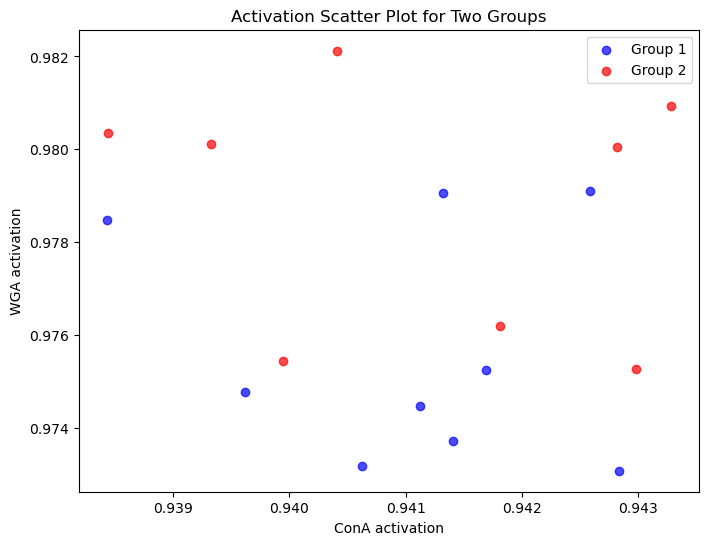

In [138]:
# Plot scatter plots for both groups
plt.figure(figsize=(8, 6))
plt.scatter(activation1_array[:,0], activation1_array[:,1], color='blue', label='Group 1', alpha=0.7)
plt.scatter(activation2_array[:,0], activation2_array[:,1], color='red', label='Group 2', alpha=0.7)

# Labels and legend
plt.xlabel('ConA activation')
plt.ylabel('WGA activation')
plt.title('Activation Scatter Plot for Two Groups')
plt.legend()
plt.show()